In [338]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [339]:
sp = pd.read_csv("S&P500.csv")
sp.head(10)

,Date,Close,Volume,Open,High,Low
0,5/15/2023,4136.28,--,4126.65,4141.25,4110.27
1,5/12/2023,4124.08,--,4138.54,4143.74,4099.12
2,5/11/2023,4130.62,--,4132.24,4132.80,4109.29
3,5/10/2023,4137.64,--,4143.74,4154.28,4098.92
4,5/9/2023,4119.17,--,4124.25,4130.35,4116.65
5,5/8/2023,4138.12,--,4136.98,4142.30,4123.81
6,5/5/2023,4136.25,--,4084.73,4147.02,4084.73
7,5/4/2023,4061.22,--,4082.55,4082.61,4048.28
8,5/3/2023,4090.75,--,4122.25,4148.30,4088.86
9,5/2/2023,4119.58,--,4164.10,4164.10,4089.72


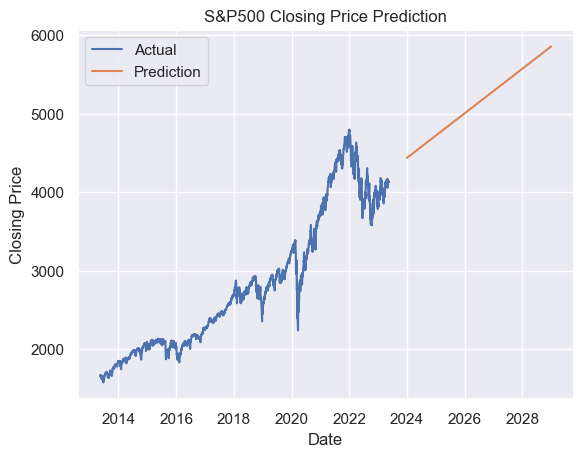

In [340]:
# Convert 'Date' column to datetime
sp['Date'] = pd.to_datetime(sp['Date'])

# Filter the data from 2023 to 2028
start_date = pd.to_datetime('2013-01-01')
end_date = pd.to_datetime('2023-05-15')
sp = sp[(sp['Date'] >= start_date) & (sp['Date'] <= end_date)]

# Set 'Date' as the index
sp.set_index('Date', inplace=True)

# Extract the features and target variable
X = sp.index.to_julian_date().values.reshape(-1, 1)
y = sp['Close'].values

# Create the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X, y)

# Generate predictions for future dates
future_dates = pd.date_range(start='2024-01-01', end='2028-12-31', freq='D')
future_X = future_dates.to_julian_date().values.reshape(-1, 1)
predictions = model.predict(future_X)


# Plot the actual data
plt.plot(sp.index, y, label='Actual')

# Plot the predictions
plt.plot(future_dates, predictions, label='Prediction')

# Customize the graph
plt.title('S&P500 Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# Display or save the graph
plt.show()